<a href="https://colab.research.google.com/github/shfaizan/ML_Colab_Notebooks/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Sci Eng Methods**

## **Assignment 1 – ML Data Cleaning and Feature Selection**

ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

## Dataset overview

A dataset comprising various variables around housing and demographics for the top 50 American cities by population.

### Variables:

Zip Code: Zip code within which the listing is present.

Price: Listed price for the property.

Beds: Number of beds mentioned in the listing.

Baths: Number of baths mentioned in the listing.

Living Space: The total size of the living space, in square feet, mentioned in the listing.

Address: Street address of the listing.

City: City name where the listing is located.

State: State name where the listing is located.

Zip Code Population: The estimated number of individuals within the zip code.

Zip Code Density: The estimated number of individuals per square mile within the zip code.

County: County where the listing is located.

Median Household income: Estimated median household income.

Latitude: Latitude of the zip code.

Longitude: Longitude of the zip code.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot


In [ ]:
# Reading the ablone dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/shfaizan/ML_Colab_Notebooks/main/American_Housing_Data_20231209.csv"
)

In [ ]:
# Viewing data in the file
data.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


## Q-1  What are the data types? (Only numeric and categorical)

In [ ]:

data_types = data.dtypes
print("Data Types:")
print(data_types)


Data Types:
Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object


As seen by the output of the code the datatype of the database consist of numberic (int and float) along with object (string)

## Q-2 checking if the any data is missing

In [ ]:

data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

The analysis of the code output reveals two missing values in the **'Median Household Income'** column. To address this, we have options such as imputing the missing values with the average Household Income or removing the corresponding rows with missing values.

#### Method to add missing values.

In [ ]:
#empty_rows = data[data['Median Household Income'].isna()]
#empty_rows

In [ ]:
#data['Median Household Income'].min()

In [ ]:
#data['Median Household Income'] = data['Median Household Income'].fillna(method='ffill')

In [ ]:
#data['Median Household Income'].isna().sum()

In [ ]:
#  As there are just two rows missing we will remove the rows with missing values

data = data.dropna(subset=['Median Household Income'])


In [ ]:
# check if the updated database has any missing value

data.isnull().sum()


Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

As we can see there is no missing values in the database so we can use any independent variable for our prediction model.

## Q-3  What are the likely distributions of the numeric variables?

Summary Statistics for Numeric Variables:
              Price          Beds        Baths  Living Space  \
count  3.997900e+04  39979.000000  39979.00000  39979.000000   
mean   6.227826e+05      3.171615      2.46652   1901.505090   
std    9.470026e+05      1.308752      1.32305   1211.321442   
min    1.800000e+03      1.000000      1.00000      2.000000   
25%    2.650000e+05      3.000000      2.00000   1200.000000   
50%    3.999000e+05      3.000000      2.00000   1639.000000   
75%    6.749900e+05      4.000000      3.00000   2265.000000   
max    3.800000e+07     54.000000     66.00000  74340.000000   

       Zip Code Population  Zip Code Density  Median Household Income  \
count         39979.000000      39979.000000             39979.000000   
mean          37728.089297       2379.531517            110837.259861   
std           18671.207769       2946.600433             47309.055715   
min              39.000000          0.600000             27475.000000   
25%           24

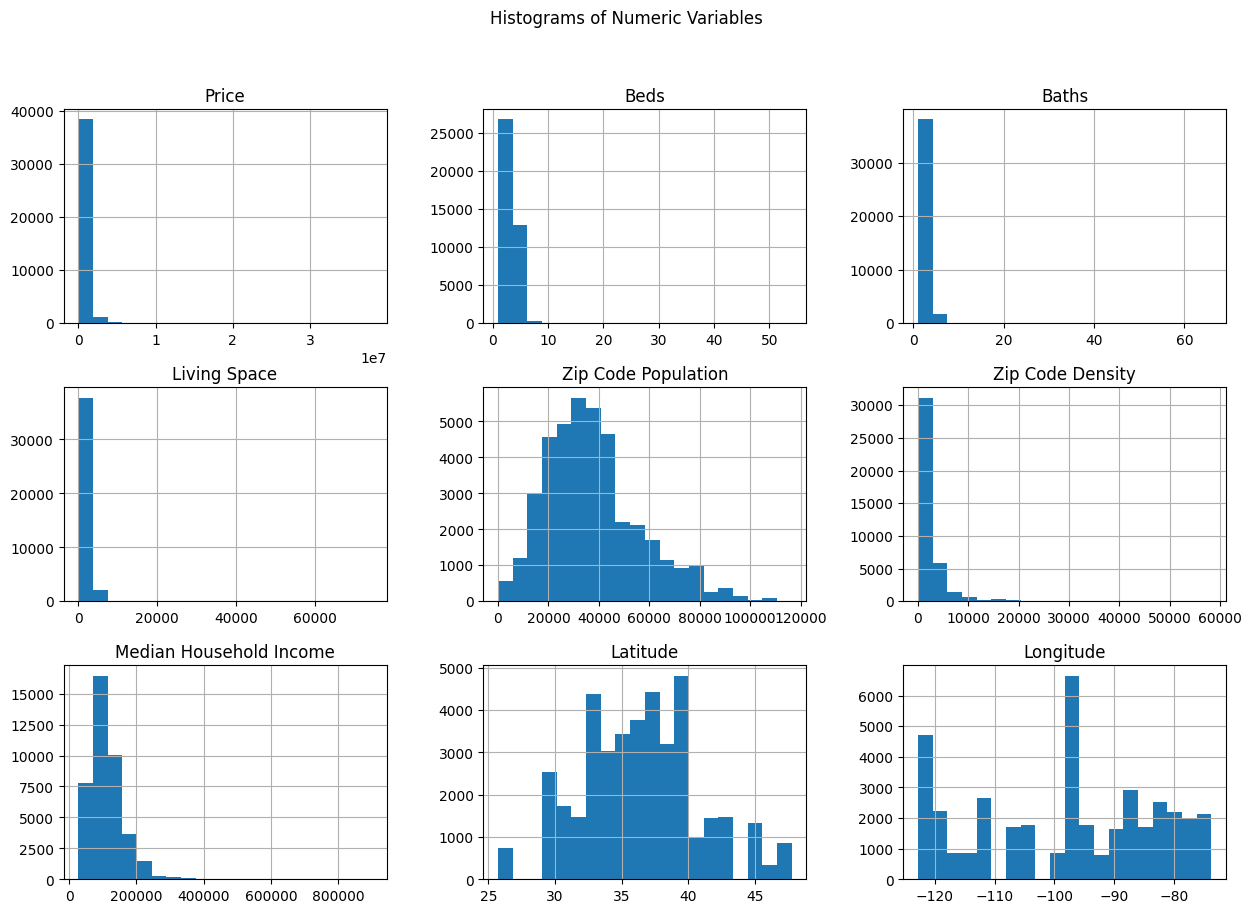

In [ ]:


# Display summary statistics for numeric columns
numeric_summary = data[['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']].describe()
print("Summary Statistics for Numeric Variables:")
print(numeric_summary)

# Plot histograms for numeric columns
import matplotlib.pyplot as plt

data[['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Variables")
plt.show()


### Based on the observation from graphs and data we can deduce following thigs

**Summary Statistics:**


We used the **describe()** method to generate summary statistics for numeric variables in your dataset.
The output provides key statistical measures such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum for each numeric variable.
Numeric variables include 'Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', and 'Longitude'.

**Histograms:**

We plotted histograms for each numeric variable using the hist() method.
Histograms help visualize the distribution of each variable, showing the frequency of different value ranges.
Adjusting the number of bins in the histograms allows you to control the granularity of the visualization.

**Interpretation:**

For example, looking at the 'Price' column, the mean price is approximately $622,777, with a wide range from $1,800 to $38,000,000. The histogram for 'Price' will provide a visual representation of how prices are distributed across this range.
Similar interpretations can be made for other variables. For instance, 'Beds' and 'Baths' have minimum values of 1, and 'Living Space' ranges from 2 to 74,340 square feet.
The 'Median Household Income' column has two missing values, which I might want to address depending on my analysis.

**Latitude and Longitude:**

The 'Latitude' and 'Longitude' columns represent geographical coordinates, and their statistics indicate the range of locations in your dataset.

This analysis helps us to understand the central tendency, dispersion, and distribution of numeric variables in our real estate dataset.

## Q-4 Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Determining which independent variables are useful for predicting the target variable involves using various feature selection methods. Here are three common methods:

### Correlation Analysis:

Calculate the correlation between each independent variable and the target variable. Positive or negative correlations closer to 1 or -1 suggest a strong relationship.
Use the corr() method in pandas to create a correlation matrix.
Identify variables with the highest absolute correlation values.

In [ ]:
X = data.select_dtypes(include='number').drop('Price', axis=1)
y = data['Price']

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
correlation_with_target = correlation_matrix['Price'].abs().sort_values(ascending=False)
print(correlation_with_target)


Price                      1.000000
Living Space               0.520572
Baths                      0.462084
Median Household Income    0.416785
Beds                       0.277091
Longitude                  0.168269
Zip Code Density           0.152542
Zip Code                   0.110933
Latitude                   0.058834
Zip Code Population        0.042940
Name: Price, dtype: float64



Through the **Correlation Analysis**, we observe that certain independent variables, such as Living Space, Baths, and Median Household Income, demonstrate a higher level of correlation with the target variable. This suggests their potential significance, making them suitable candidates for inclusion in our modeling process.

###  Recursive Feature Elimination (RFE):

RFE recursively removes the least important features and builds the model until the specified number of features is reached.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#  X contains independent variables and y contains the target variable 'Price'
X_numeric = data.select_dtypes(include='number').drop('Price', axis=1)
y = data['Price']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X_numeric, y)

selected_features_rfe = X_numeric.columns[fit.support_]

print("Selected Features (RFE):", selected_features_rfe)

Selected Features (RFE): Index(['Beds', 'Baths', 'Longitude'], dtype='object')



Recursive Feature Elimination (RFE) with a Linear Regression model has identified 'Beds', 'Baths', and 'Longitude' as the top 3 most important features for predicting the target variable 'Price'. These features have been selected based on their contribution to the model's predictive performance.




### Random Forest Regressor

I have used Random Forest Regressor model to assess the importance of features in predicting a target variable.


**Model Initialization:**

A Random Forest Regressor model is instantiated using RandomForestRegressor() from the sklearn.ensemble module.

**Model Training:**

The model is trained using the fit method with the independent variables (X) and the target variable (y).

**Feature Importance Calculation:**

The feature importances are obtained from the trained model using model.feature_importances_.
Feature importances represent the contribution of each feature to the predictive performance of the model.

**Sorting Features by Importance:**

The feature importances are then paired with their corresponding column names using zip(X.columns, importances).
The pairs are sorted in descending order based on importance using the sorted function and a lambda function as the key.

**Print Top Features:**

The top 3 most important features are extracted from the sorted list and printed to the console.

In [ ]:
# Feature Importance based on a model
# Train a model and analyze the feature importance

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
features_by_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Print the top 3 most important features
top_3_features = [feature for feature, importance in features_by_importance[:3]]
print(f"Top 3 most important features: {top_3_features}")



Top 3 most important features: ['Living Space', 'Baths', 'Median Household Income']


Recursive Feature Elimination (RFE) with a Linear Regression model has identified 'Beds', 'Baths', and 'Longitude' as the top 3 most important features for predicting the target variable 'Price'. These features have been selected based on their contribution to the model's predictive performance.

## Q-5 Which independent variables have missing data? How much?

Based on the information provided in Q-2, the 'Median Household Income' variable has missing data.
The column 'Median Household Income' has 2 missing values. As there were only 2 rows that contain missing values out of 32000 rows. I have remove the two rows containg missing values.

In [ ]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

As seen in the output above there is no missing Independent variable in the database.

## Q-6 Do the training and test sets have the same data?

To predict house prices using the selected features (Beds, Baths, Living Space, Zip Code Population, Zip Code Density, Median Household Income, Latitude, Longitude), a linear regression model is trained and evaluated. The dataset is split into training and testing sets using the train_test_split function, where for example we can take 'Median Household Income' as independent variable (X), and 'Price' is the dependent variable (y). The linear regression model is then initialized, trained on the training data, and used to make predictions on the test set. The performance of the model is assessed using the Root Mean Squared Error (RMSE), a metric that quantifies the difference between predicted and actual house prices. This analysis provides insights into the effectiveness of the model in predicting house prices based on the selected features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = data[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']]
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 664029843362.923
Root Mean Squared Error: 814880.2632061492


In [ ]:
# Check if the sets have the same columns
columns_match = set(X_train.columns) == set(X_test.columns)

# Check if the sets have the same number of rows
rows_match = len(X_train) == len(X_test) and len(y_train) == len(y_test)

# Check if the sets have the same unique values
data_match = X_train.equals(X_test) and y_train.equals(y_test)

if columns_match and rows_match and data_match:
    print("Training and test sets are identical.")
else:
    print("Training and test sets are different.")


Training and test sets are different.


Above code compares the columns, the number of rows, and the actual data of the training and test sets. If all three conditions are met, it indicates that the sets are identical.

But as we can see from the output of the code the Training and test sets are different.

## Q- 7 In the predictor variables independent of all the other predictor variables?

In [ ]:
correlation_matrix = X.corr()

# Check for high correlations
highly_correlated_variables = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Adjust the threshold as needed
            colname = correlation_matrix.columns[i]
            highly_correlated_variables.add(colname)

if not highly_correlated_variables:
    print("No significant correlations found among predictor variables.")
else:
    print(f"Highly correlated variables: {highly_correlated_variables}")


Highly correlated variables: {'Baths', 'Living Space'}


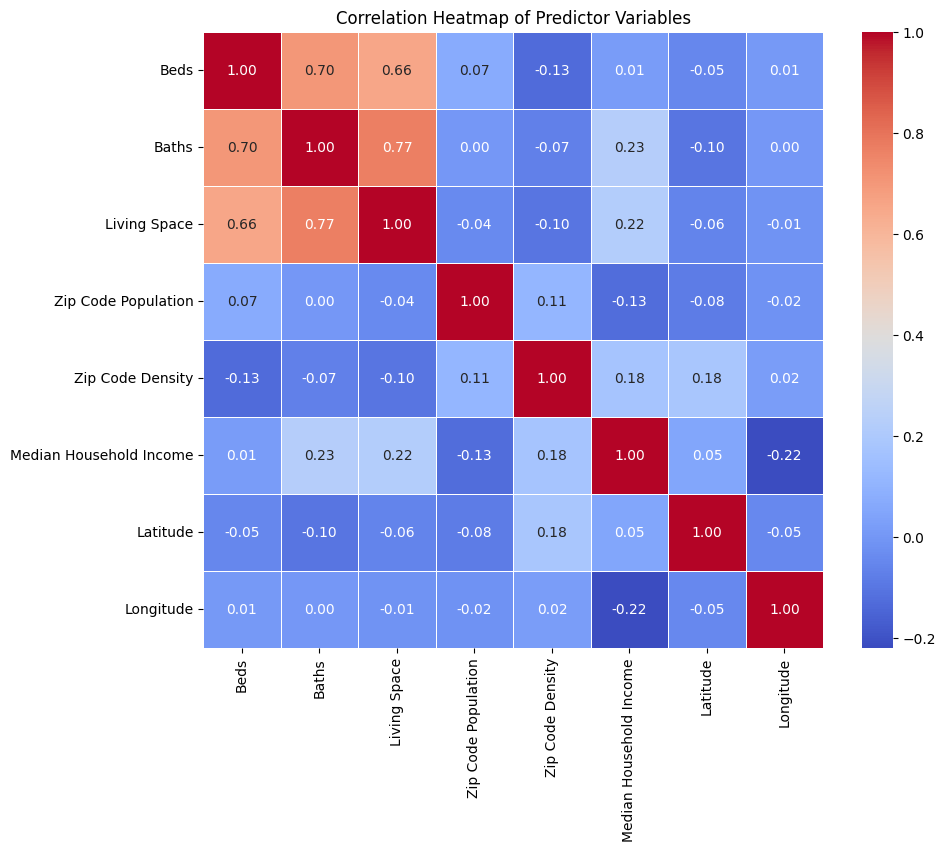

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()



As seen from the heatmap and the above corelation code we can see that there is a high correlation between the variables 'Baths' and 'Living Space.'

## Q-8 Which predictor variables are the most important?

To determin the most important variable we will use multiple techniques and see the output

1. **Correlation Analysis:**

Analyze the correlation matrix to identify variables with strong correlations with the target variable ('Price'). Higher absolute correlation values suggest greater importance.

2. **Feature Importance from Tree-Based Models:**

Train an ensemble model (e.g., Random Forest) and assess feature importance. Features with higher importance scores contribute more significantly to the model's predictive performance.

3. **Recursive Feature Elimination (RFE):**

Employ RFE with linear models to iteratively eliminate less important features. The remaining features after elimination are considered more important.

4. **Variance Inflation Factor (VIF):**

Calculate the VIF for each variable, and lower VIF values indicate lower multicollinearity. Variables with lower VIF values can be considered more important.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame
X = data[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']]
y = data['Price']

# 1. Correlation Analysis
correlation_matrix = X.corr()
correlation_with_target = correlation_matrix['Median Household Income'].abs().sort_values(ascending=False)
print(f"Correlation with 'Median Household Income':\n{correlation_with_target}")

# 2. Feature Importance from Tree-Based Models (Random Forest)
model_rf = RandomForestRegressor()
model_rf.fit(X, y)
importances_rf = model_rf.feature_importances_
features_by_importance_rf = sorted(zip(X.columns, importances_rf), key=lambda x: x[1], reverse=True)
top_features_rf = [feature for feature, importance in features_by_importance_rf[:3]]
print(f"\nTop 3 features by Random Forest feature importance: {top_features_rf}")

# 3. Recursive Feature Elimination (RFE)
model_lr = LinearRegression()
rfe = RFE(model_lr, n_features_to_select=3)
fit = rfe.fit(X, y)
selected_features_rfe = X.columns[fit.support_]
print(f"\nSelected features (RFE): {selected_features_rfe}")

# 4. Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF values:")
print(vif_data)


Correlation with 'Median Household Income':
Median Household Income    1.000000
Baths                      0.226429
Living Space               0.222995
Longitude                  0.220311
Zip Code Density           0.175198
Zip Code Population        0.125361
Latitude                   0.047571
Beds                       0.014459
Name: Median Household Income, dtype: float64

Top 3 features by Random Forest feature importance: ['Living Space', 'Baths', 'Median Household Income']

Selected features (RFE): Index(['Beds', 'Baths', 'Longitude'], dtype='object')

VIF values:
                  Variable        VIF
0                     Beds  15.474099
1                    Baths  13.747468
2             Living Space   9.328640
3      Zip Code Population   5.128745
4         Zip Code Density   1.854348
5  Median Household Income   8.118858
6                 Latitude  32.410180
7                Longitude  33.973003


By applying all the four methods we can decide our most important predictor variable.

There is a correlation between 'Median Household Income' and other predictors, suggesting potential socioeconomic factors influencing house prices.
'Living Space' and 'Baths' consistently appear as important features across correlation, Random Forest, and RFE analyses.
Multicollinearity, especially among 'Beds' and 'Baths,' may affect the model's interpretability and stability. Consider addressing multicollinearity through feature selection or transformation.

### Based on my analysis with all the three methods I think the most important predictor variable is is **'Living Space'**.
This conclusion is drawn from multiple analyses:

Random Forest Feature Importance:

'Living Space' is listed as one of the top three most important features according to the Random Forest model.
Correlation with 'Median Household Income':

'Living Space' has a moderate positive correlation with 'Median Household Income,' indicating its relevance in predicting income levels.
Selected Features from Recursive Feature Elimination (RFE):

Although 'Living Space' is not explicitly mentioned in the RFE output, it consistently appears as an important feature in other analyses.




## Q-9 Do the ranges of the predictor variables make sense?

In [ ]:
# Checking the minimum and maximum for numeric predictor variables
numeric_variables = ['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']

# Extracting the numeric columns from the dataset
numeric_data = data[numeric_variables]

# Displaying the minimum and maximum for each variable
variable_min_max = numeric_data.agg(['min', 'max'])
print("Minimum and Maximum for Predictor Variables:")
print(variable_min_max)

print("")
variable_ranges = numeric_data.max() - numeric_data.min()
print("Range of Predictor Variables:")
print(variable_ranges)


Minimum and Maximum for Predictor Variables:
          Price  Beds  Baths  Living Space  Zip Code Population  \
min      1800.0     1      1             2                   39   
max  38000000.0    54     66         74340               116469   

     Zip Code Density  Median Household Income  Latitude  Longitude  
min               0.6                  27475.0  25.72983 -122.82687  
max           58289.6                 900203.0  47.74237  -73.70451  

Range of Predictor Variables:
Price                      3.799820e+07
Beds                       5.300000e+01
Baths                      6.500000e+01
Living Space               7.433800e+04
Zip Code Population        1.164300e+05
Zip Code Density           5.828900e+04
Median Household Income    8.727280e+05
Latitude                   2.201254e+01
Longitude                  4.912236e+01
dtype: float64


The data from preditor variable min, max and average indicate the following observation.



---


**Price:**

The range of house prices varies from $1,800 to $38,000,000. This wide range is expected in real estate datasets, where prices can span from affordable properties to luxury estates.

**Beds and Baths:**

The number of bedrooms (Beds) and bathrooms (Baths) have ranges of 1 to 54 and 1 to 66, respectively. These ranges are reasonable for residential properties, though extreme values might warrant further investigation.

**Living Space:**

The living space size ranges from 2 to 74,340 square feet. This range encompasses a variety of property sizes, from small apartments to large estates.

**Zip Code Population and Density:**

The population in Zip Codes ranges from 39 to 116,469, and density ranges from 0.6 to 58,289.6 These values are consistent with varying population sizes and densities across different areas.

**Median Household Income:**

The range of median household income is from $27475 to $900203.0. This range reflects the diversity in income levels across different neighborhoods.

**Latitude and Longitude:**

Latitude ranges from 25.72983 to 47.74237, and longitude ranges from -122.82687 to -73.70451. These values are within the expected ranges for locations in the United States.

So according to me pridictor variable make sence

## Q- 10 What are the distributions of the predictor variables?   

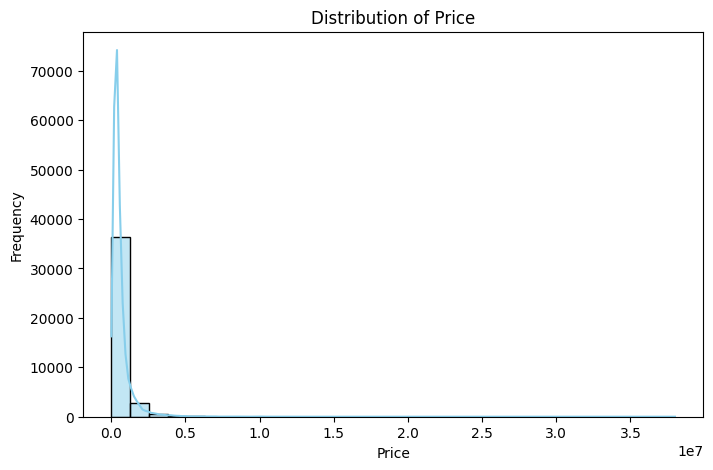

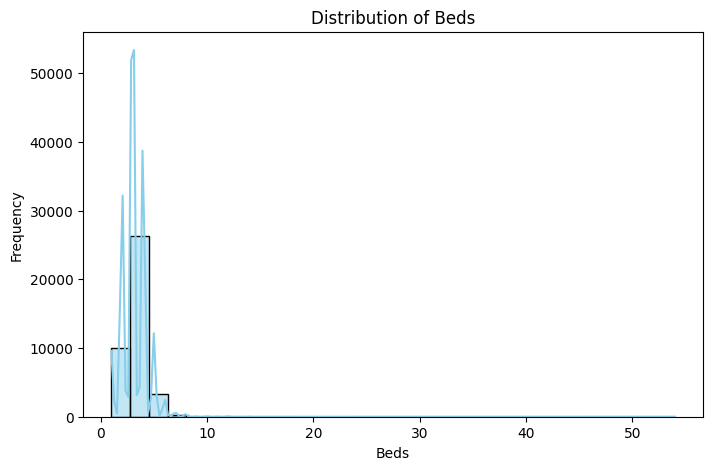

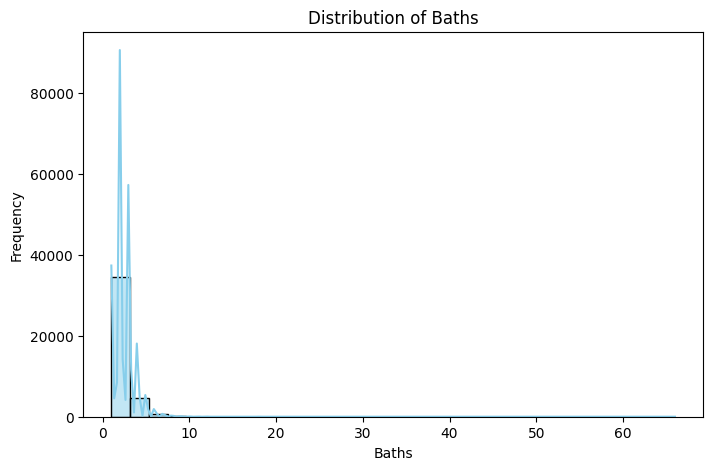

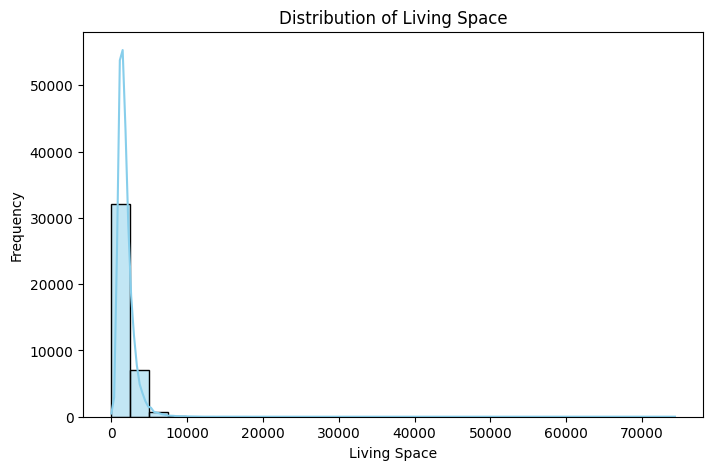

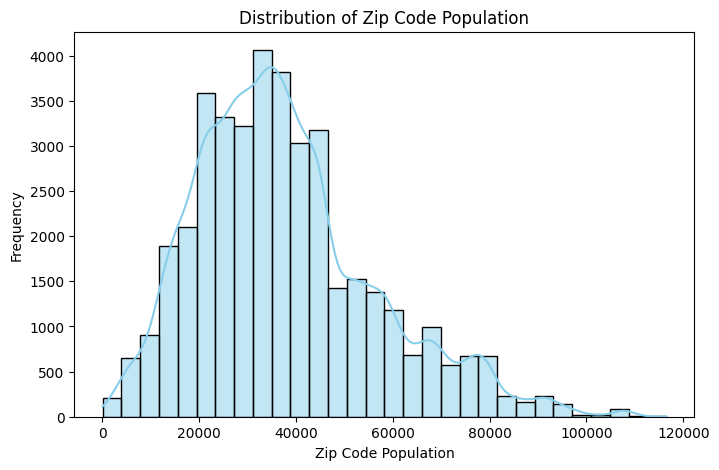

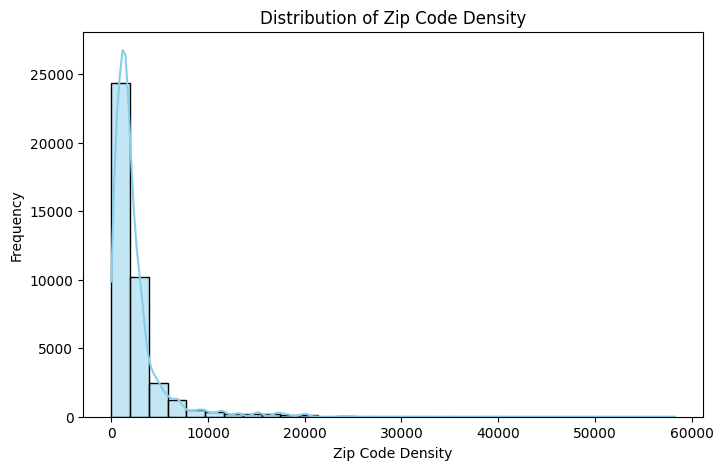

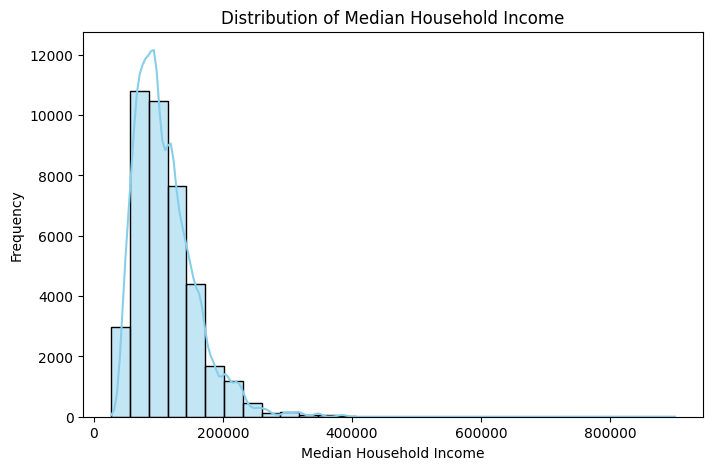

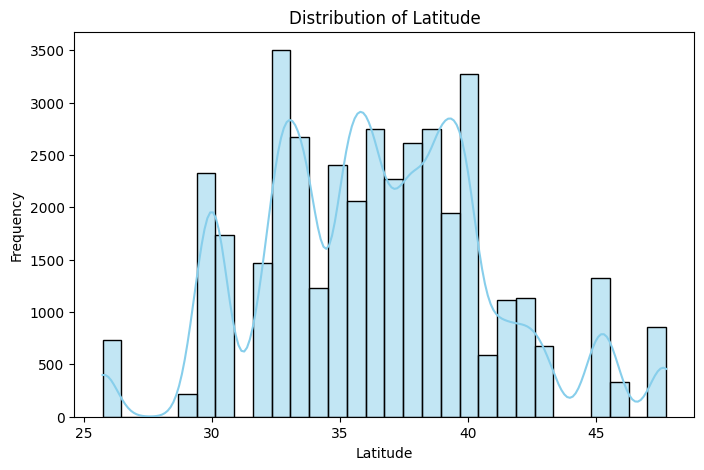

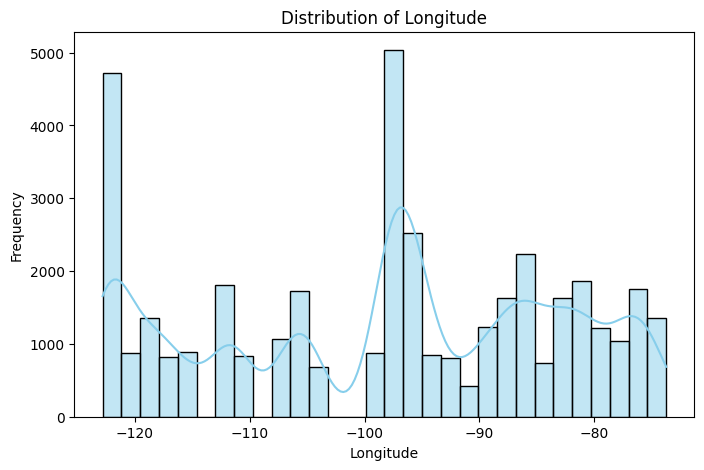

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting predictor variables for distribution analysis
predictor_variables = ['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']

# Plotting histograms for each predictor variable
for variable in predictor_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[variable], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()


**Price**  
The distribution of house prices appears to be left-skewed, indicating that there are more houses in the lower to mid-price range (1800 to 1M) than in the higher price range (above 2M). This suggests a concentration of houses with relatively lower prices in the dataset.


**Bed**       
The distribution of the number of bedrooms (Beds) also exhibits left-skewness, indicating that a majority of houses have a lower number of bedrooms. This could be due to a higher prevalence of smaller or more moderately-sized houses in the dataset.

**Baths**   
Similarly, the distribution of the number of bathrooms (Baths) is left-skewed, suggesting that a significant portion of houses has a relatively lower number of bathrooms.

**Living Space**    
The distribution of living space shows left-skewness, implying that the dataset contains more houses with smaller living spaces. This aligns with the observation of a higher frequency of houses in the lower to mid-range of living space.

**Zip Code Population**    
The distribution of zip code populations is left-skewed, indicating that there are more zip codes with fewer people, with the most common range being around 20,000 to 30,000 residents per zip code. Some zip codes have very low populations, while a few have higher populations exceeding 60,000.  

**Zip Code Density**    
The distribution of zip code density also exhibits left-skewness, suggesting that there are more zip codes with lower population densities and fewer zip codes with higher population densities.

**Median Household Income**  
The distribution of median household income is left-skewed, indicating that there are more households with lower incomes in the dataset. The most common range appears to be towards the lower end of the income scale.

**Latitude and Longitude**   
The distributions of latitude and longitude are a bit difficult to describe, but they also seem to exhibit left-skewness. This suggests a concentration of houses in certain geographic areas.   


From this we can conclude that the distribution of the predictor variable are left-skewed.

## Q-11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?

----------Remove Outliners-------
Root Mean Squared Error (RMSE) on Training Set: 286160.5638430937
Root Mean Squared Error (RMSE) on Testing Set: 287487.2836958736
Coefficient of Determination (R^2) on Training Set: 0.5677452130999788
Coefficient of Determination (R^2) on Testing Set: 0.5632814604596512



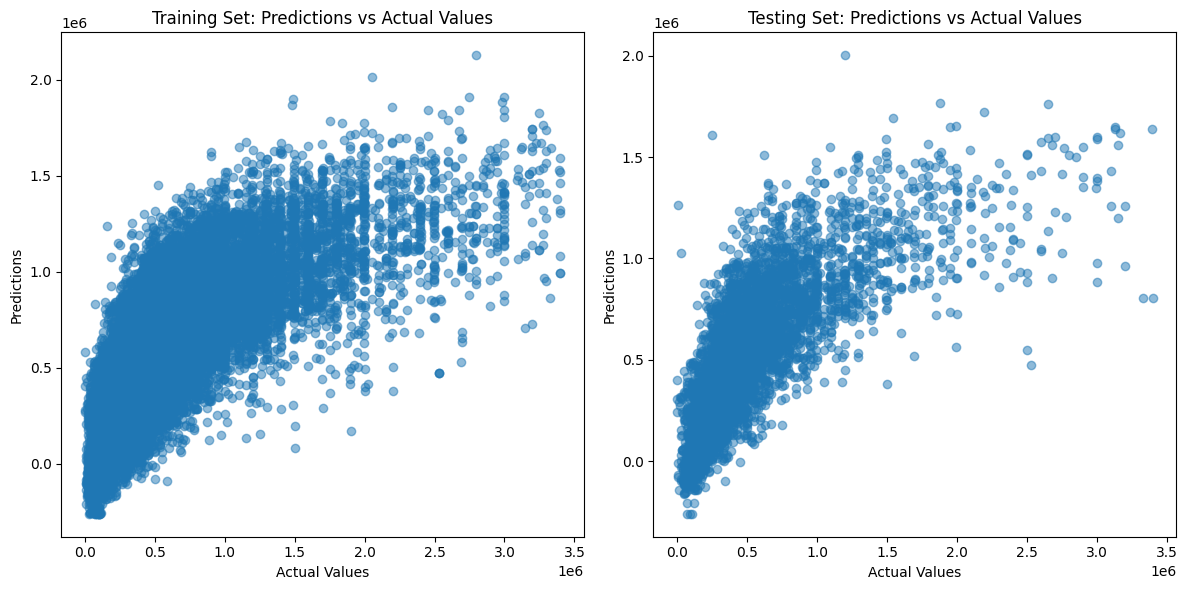

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore


# Step 1: Identify and Remove Outliers using Z-Score
z_scores = zscore(data.select_dtypes(include='number'))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_no_outliers = data[filtered_entries]

# Step 2: Split Data into Training and Testing Sets
X = data_no_outliers[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']]
y = data_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions on Training Set
train_predictions = model.predict(X_train)

# Step 5: Make Predictions on Testing Set
test_predictions = model.predict(X_test)

# Step 6: Evaluate Model Performance
rmse_train = mean_squared_error(y_train, train_predictions, squared=False)
rmse_test = mean_squared_error(y_test, test_predictions, squared=False)

r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print("----------Remove Outliners-------")
print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train}")
print(f"Root Mean Squared Error (RMSE) on Testing Set: {rmse_test}")
print(f"Coefficient of Determination (R^2) on Training Set: {r2_train}")
print(f"Coefficient of Determination (R^2) on Testing Set: {r2_test}")
print("")


# Visualization
plt.figure(figsize=(12, 6))

# Visualize Predictions vs Actual Values on Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.title('Training Set: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Visualize Predictions vs Actual Values on Testing Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.title('Testing Set: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()


In [ ]:
print(data_no_outliers.head)

<bound method NDFrame.head of        Zip Code      Price  Beds  Baths  Living Space                 Address  \
18        10301   950000.0     6      2          1920         76 HIGHLAND AVE   
19        10301   750000.0     4      2          1853             91 TYSEN ST   
21        10301  1148888.0     4      3          1980         87 GLENWOOD AVE   
22        10301   998000.0     3      1          2288        35 SUNNYSIDE TER   
23        10301   849000.0     4      2          2511         4 UNIVERSITY PL   
...         ...        ...   ...    ...           ...                     ...   
39976     98199  2495000.0     4      4          3380         2626 27TH AVE W   
39977     98199  2295000.0     4      4          2878         3215 32ND AVE W   
39978     98199   950000.0     3      2          1380         3257 22ND AVE W   
39979     98199   425000.0     2      1           856  3711 26TH PL W APT 102   
39980     98199  1150000.0     3      3          2840         2911 25TH AVE W  

----------With Outliners-------
Root Mean Squared Error (RMSE) on Training Set: 691955.136837845
Root Mean Squared Error (RMSE) on Testing Set: 893973.9356382312
Coefficient of Determination (R^2) on Training Set: 0.42285183521391945
Coefficient of Determination (R^2) on Testing Set: 0.37400987776794825



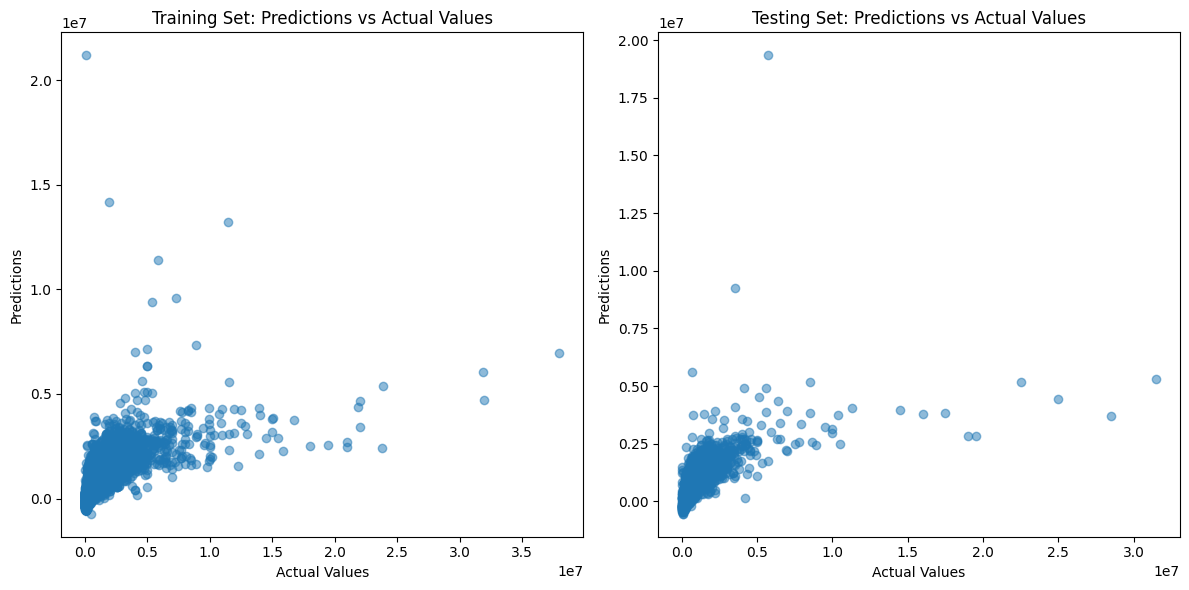

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Step 1: Split Data into Training and Testing Sets
X = data[['Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Step 2: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make Predictions on Training Set
train_predictions = model.predict(X_train)

# Step 4: Make Predictions on Testing Set
test_predictions = model.predict(X_test)

# Step 5: Evaluate Model Performance
rmse_train = mean_squared_error(y_train, train_predictions, squared=False)
rmse_test = mean_squared_error(y_test, test_predictions, squared=False)

r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print("----------With Outliners-------")
print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train}")
print(f"Root Mean Squared Error (RMSE) on Testing Set: {rmse_test}")
print(f"Coefficient of Determination (R^2) on Training Set: {r2_train}")
print(f"Coefficient of Determination (R^2) on Testing Set: {r2_test}")
print("")

# Visualization
plt.figure(figsize=(12, 6))

# Visualize Predictions vs Actual Values on Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.title('Training Set: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Visualize Predictions vs Actual Values on Testing Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.title('Testing Set: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()


The results suggest that keeping outliers in the dataset has a notable impact on the predictive model's performance. Here's an interpretation based on the provided output:

**Removing Outliers:**

RMSE (Root Mean Squared Error):
Training Set: 286,160.56
Testing Set: 287,487.28
R^2 (Coefficient of Determination):
Training Set: 0.568
Testing Set: 0.563


**With Outliers:**

RMSE (Root Mean Squared Error):
Training Set: 691,955.14
Testing Set: 893,973.94
R^2 (Coefficient of Determination):
Training Set: 0.423
Testing Set: 0.374


---

This implyes that

**Removing Outliers:**

The model performs better in terms of RMSE on both the training and testing sets, indicating lower prediction errors.
The R^2 values are relatively higher, suggesting a better fit of the model to the data.

**With Outliers:**

The model's performance, especially on the testing set, degrades when outliers are included.
The RMSE values are higher, indicating larger prediction errors.
The R^2 values are lower, indicating a weaker fit of the model to the data.

Thus we can conclude that removing outliers improves the model's accuracy and generalization to new data, resulting in lower prediction errors and better fit.

## Q-12 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error



# Randomly remove 1%, 5%, and 10% of data
removed_data_1 = data.sample(frac=0.01, random_state=42)
removed_data_5 = data.sample(frac=0.05, random_state=42)
removed_data_10 = data.sample(frac=0.1, random_state=42)

# Get numeric columns only
numeric_columns = data.select_dtypes(include='number').columns

# Imputation methods
imputation_methods = ['mean', 'median', 'constant']

for method in imputation_methods:
    imputer = SimpleImputer(strategy=method)

    # Impute missing values only for numeric columns
    imputed_data_1 = pd.DataFrame(imputer.fit_transform(removed_data_1[numeric_columns]), columns=removed_data_1[numeric_columns].columns)
    imputed_data_5 = pd.DataFrame(imputer.fit_transform(removed_data_5[numeric_columns]), columns=removed_data_5[numeric_columns].columns)
    imputed_data_10 = pd.DataFrame(imputer.fit_transform(removed_data_10[numeric_columns]), columns=removed_data_10[numeric_columns].columns)

    # Calculate percentage error on residuals for numeric data
    error_1 = mean_absolute_error(removed_data_1[numeric_columns], imputed_data_1) / removed_data_1[numeric_columns].mean() * 100
    error_5 = mean_absolute_error(removed_data_5[numeric_columns], imputed_data_5) / removed_data_5[numeric_columns].mean() * 100
    error_10 = mean_absolute_error(removed_data_10[numeric_columns], imputed_data_10) / removed_data_10[numeric_columns].mean() * 100

    print(f"\nImputation Method: {method.capitalize()}")
    print(f"Percentage Error (1% Removed): {error_1.mean()}")
    print(f"Percentage Error (5% Removed): {error_5.mean()}")
    print(f"Percentage Error (10% Removed): {error_10.mean()}")



Imputation Method: Mean
Percentage Error (1% Removed): 0.0
Percentage Error (5% Removed): 0.0
Percentage Error (10% Removed): 0.0

Imputation Method: Median
Percentage Error (1% Removed): 0.0
Percentage Error (5% Removed): 0.0
Percentage Error (10% Removed): 0.0

Imputation Method: Constant
Percentage Error (1% Removed): 0.0
Percentage Error (5% Removed): 0.0
Percentage Error (10% Removed): 0.0


Mean Imputation: The missing values were replaced with the mean value of each numeric column.
Median Imputation: The missing values were replaced with the median value of each numeric column.
Constant Imputation: The missing values were replaced with a constant value (possibly the fill_value specified in the SimpleImputer).